>>>>

>>>

>>

>

# week 11: more heterogeneity. pca. clustering.

## eeb125 | 2022.03.30

## prof. caroline fukuchi

>

>>

>>>

>>>>

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import numpy as np

In [31]:
def plot_pca(plot_data,ax1,ax2):
    # treat this code as magic.
    ax1lab="pc"+str(ax1)
    ax2lab="pc"+str(ax2)
    for name, group in plot_data.groupby('species'):
        plt.plot(group[ax1lab], group[ax2lab], marker='o', linestyle='', label=name)

    coeff = np.transpose(pca.components_[0:3,:])
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*8, coeff[i,1]*8,color = 'r',alpha = 0.9)
        plt.text(coeff[i,0]* 8, coeff[i,1] * 8, list(dat.columns[2:-1])[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC"+str(ax1)+ "("+str(round(prop_var[ax1-1]))+"%)")
    plt.ylabel("PC"+str(ax2)+ "("+str(round(prop_var[ax2-1]))+"%)")

    plt.show()

In [3]:
plt.style.use('dark_background')

## the data

measurements of traits in penguins
    - culmen (beak) length and width, flipper length, and body mass
sampled across three penguin species living on several neighboring islands 

In [32]:
dat=pd.read_csv("https://raw.githubusercontent.com/datavizpyr/data/master/palmer_penguin_species.tsv",sep="\t")

In [33]:
dat=dat.dropna(axis=0)
dat

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,MALE
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,MALE


## how do the data look? 
  - can we can easily spot differences between species?
  - this is **exploratory data analysis**

Text(0, 0.5, 'bill depth')

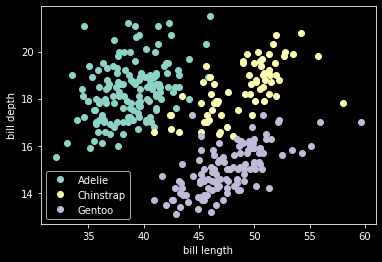

In [34]:
for name, group in dat.groupby('species'):
    plt.plot(group.culmen_length_mm, group.culmen_depth_mm, marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("bill length")
plt.ylabel("bill depth")

Text(0, 0.5, 'flipper length (mm)')

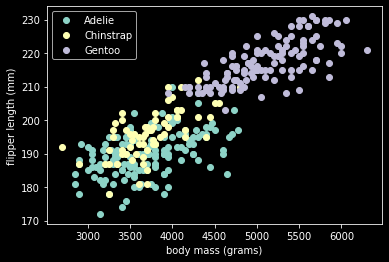

In [35]:
for name, group in dat.groupby('species'):
    plt.plot(group.body_mass_g, group.flipper_length_mm, marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("body mass (grams)")
plt.ylabel("flipper length (mm)")

# dimension reduction

- working through each pair of variables like this can quickly become overwhelming
- many variables may be **redundant** because they are related to one another
  + e.g., if we know a penguin's body mass, we can make a good guess about its flipper length

# principal components analysis (pca)

- pca helps us by constructing a new set of variables that describe the differences bewteen pengins
  + these new variables are constructed using the original ones

# principal components analysis (pca)

- pca finds new variables that:
  + 1) differ the most across all penguins
  + 2) capture the most information across the original measurements (flipper length, body mass, etc)

# pca and regression

- this does not differ too much from what we are doing in regression. in regression, we seek a single line that:
  + 1) captures the greatest breadth of difference between two measurements
  + 2) best allows us to predict the measurements (e.g., if resampled from the same population)



# principal components analysis (pca)

- GAD and ASD are correlated
- we can create a new measurement that captures information from both GAD and ASD by comparing the original points to the line


![](images/correlation.png)

# principal components analysis (pca)

- GAD and ASD are correlated
- find the closest path between each data point and the line and mark that point on the line

![res](images/resid.svg)


# principal components analysis (pca)

- the location of these points along the line form the basis of a new measurement
  + this new measurement combines information from both original variables

![res](images/resid1.svg)


# principal components analysis (pca)

- pca draws lines like this between **all** of our measurements (not just two)
- each line thus contains a different 'combination' of the original measurements
  + we call each of these lines a "principal component"

![res](images/resid1.svg)


In [9]:
traits=dat.loc[:,dat.columns[2:-1]].values #
traits_scaled=StandardScaler().fit_transform(traits)
traits_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, -0.53738048],
       [ 1.24663828,  0.93330475,  0.64546078, -0.13315457],
       [ 1.13675725,  0.7807321 , -0.2120064 , -0.53738048]])

fit the PCA:

# fit our pca

- we had 4 original measurements and will get 4 new 'principal components', each in a column
  + each column represents a different 'line' used to combine our original measurements

In [20]:
pca=PCA()
fit=pca.fit_transform(traits_scaled)
scores = pd.DataFrame(data = fit, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
scores.head() # these are our new measurements-- our 'principal components'

,pc1,pc2,pc3,pc4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416


# organizing ourselves

- like our original data, each row corresponds to a single individual
- let's add back the information about which species each row belongs to

In [21]:
plot_data=scores.copy()
plot_data["species"]=np.array(dat["species"])
plot_data

,pc1,pc2,pc3,pc4,species
0,-1.853593,0.032069,-0.234902,0.528397,Adelie
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie
...,...,...,...,...,...
328,0.553475,2.347612,0.869245,-0.388080,Chinstrap
329,-0.739914,0.248155,0.316067,-0.733778,Chinstrap
330,-0.367890,0.991080,0.887996,0.195863,Chinstrap
331,0.492360,1.484849,0.329960,-0.550859,Chinstrap


# variance

- the "spread" of the data around this line reflects the variation in the dataset
- each principal component explains a different proportion of the overall spread across all of the measurements

![res](images/resid.svg)


# variance

- we can find out exactly how much of this spread is captured by each principal component (PC)
- PCs with higher values explain more information from the original dataset

In [17]:
prop_var=pca.explained_variance_ratio_ * 100
prop_var

array([68.63389314, 19.45292928,  9.21606299,  2.69711459])

# visualizing differences between groups

- one handy thing about PCA is that it allows us to visualize how simlar different groups are within our data

Text(0, 0.5, 'PC 2')

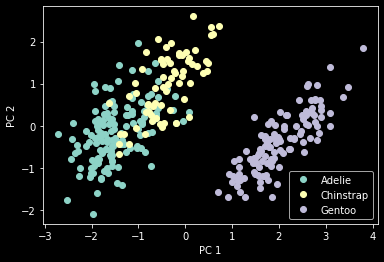

In [15]:
for name, group in plot_data.groupby('species'):
    plt.plot(group.pc1, group.pc2, marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# visualizing differences between groups

- one handy thing about PCA is that it allows us to visualize how simlar different groups are within our data

Text(0, 0.5, 'PC 3')

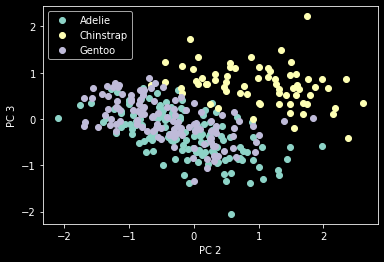

In [16]:
for name, group in plot_data.groupby('species'):
    plt.plot(group.pc2, group.pc3, marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("PC 2")
plt.ylabel("PC 3")

# relationships between variables

- we can check how and which measurements are combined into each PC
  - same direction: positively correlated (as x gets bigger, y gets bigger)
  - opposite direction: negatively correlated (as x gets bigger, y gets smaller)
  - perpendicular: uncorrelated (x and y have no relationship)

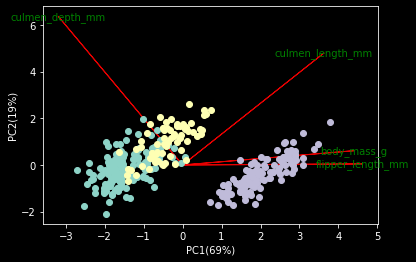

In [28]:
plot_pca(plot_data,1,2)

# relationships between variables

- we can check how and which measurements are combined into each PC
  - same direction: positively correlated (as x gets bigger, y gets bigger)
  - opposite direction: negatively correlated (as x gets bigger, y gets smaller)
  - perpendicular: uncorrelated (x and y have no relationship)

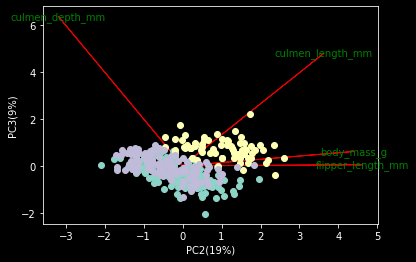

In [29]:
plot_pca(plot_data,2,3)

# finding groups within our data

- pca gives us one nice way to explore differences between groups of our data
- there are other ways we can explore such differences too

# finding groups within our data

this week, we are going to learn about a statistical technique called **clustering**. This is a very broad class of statistical approaches that is focused on finding natural groupings within datasets (which we call 'clusters').

## clustering

- grouping observations that are similar to one another
- **clusters**: subgroups of data points within a dataset that are similar to one another

## hierarchical clustering

finds clusters by constructing a **dendrogram**
  + **dendrogram:** a network that maps the similarity of all of the data points in a type of network  
  
![Alt Text](images/pengin_clust.svg)


### how to build a dendrogram:
   1. **treat each data point as its own cluster.**
       + in this case, we have 333 individual penguins so we will start with 333 clusters
       + what groups of pengiuns are most similar to one another?




### how to build a dendrogram:
   1. treat each data point as its own cluster. 
       + in this case, we have 333 individual penguins so we will start with 333 clusters
   2. **join the two closest data points to make a new cluster**
       + we now have 332 clusters



### how to build a dendrogram:
   1. treat each data point as its own cluster. 
       + in this case, we have 333 individual penguins so we will start with 333 clusters
   2. join the two closest data points to make a new cluster
       + we now have 332 clusters
   3. **repeat 1 and 2 until all the observations are joined together**
       + distances between each pair constructs hierarchy of relatedness
       + more similar data points are closer together on the dendrogram
       


### how to build a dendrogram:

- more similar observations are more tightly connected in
- branches connecting more similar observations are shorter

    ![Alt Text](images/dendro.svg)


![Alt Text](images/dendro2.svg)


# an alternative illustration

![Alt Text](images/pengin_clust0.svg)

# an alternative illustration

![Alt Text](images/pengin_clust1.svg)

# an alternative illustration

![Alt Text](images/pengin_clust2.svg)

# an alternative illustration

![Alt Text](images/pengin_clust.svg)

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [22]:
linked = linkage(scores, 'ward')
linked

array([[1.52000000e+02, 2.36000000e+02, 1.09065116e-01, 2.00000000e+00],
       [1.86000000e+02, 2.37000000e+02, 1.09065116e-01, 2.00000000e+00],
       [3.10000000e+01, 1.01000000e+02, 1.26258718e-01, 2.00000000e+00],
       ...,
       [6.49000000e+02, 6.59000000e+02, 1.21267666e+01, 1.19000000e+02],
       [6.60000000e+02, 6.61000000e+02, 1.83987026e+01, 2.14000000e+02],
       [6.62000000e+02, 6.63000000e+02, 3.94798424e+01, 3.33000000e+02]])

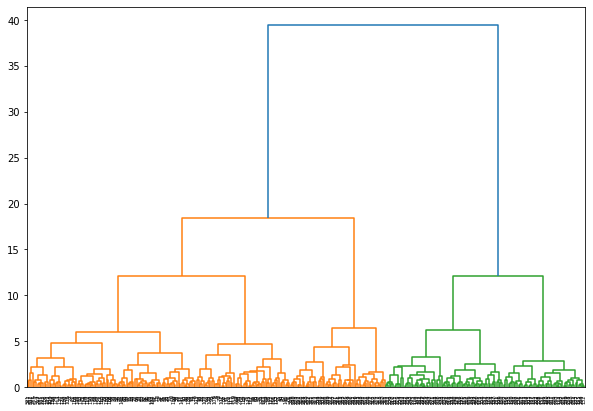

In [23]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## dendrogram -> clusters

given a dendrogram, we can identify _K_ discrete clusters by "cutting" away the longest branches 
  + remember that the lines connecting datapoints represent distances
  + we are identifying the clusters that are farthest apart from one another


![Alt Text](images/hclust.svg)


# an alternative illustration

![Alt Text](images/pengin_clust3.svg)

## dendrogram -> clusters

we can perform this using the AgglomerativeClustering function. 
  + this will construct a dendrogram using the criterion we choose and then trim the tree to yield a set of discrete clusters
  + we will choose to cut the dendrogram into 3 clusters


In [30]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(scores)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,

In [31]:
plot_data["HClust"]=cluster.labels_

we will then save these cluster labels in our plot_data object to visualize
  - we'll then compare how well hierarchical clustering does at predicting the species groupings

Text(0.5, 1.0, 'HClust groupings')

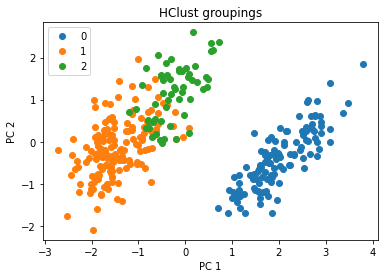

In [26]:
for name, group in plot_data.groupby('HClust'):
    plt.plot(group.pc1, group.pc2, marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("HClust groupings")

Text(0.5, 1.0, 'Species groupings')

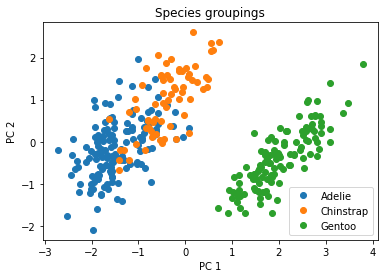

In [27]:
for name, group in plot_data.groupby('species'):
    plt.plot(group.pc1, group.pc2, marker='o', linestyle='', label=name)
plt.legend()
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Species groupings")

In [32]:
sp_map={"Adelie":0,"Chinstrap":1,"Gentoo":2}
species_clusters=np.array([sp_map[i] for i in plot_data["species"]])


## compare clustering results to natural species groupings

In [33]:
from sklearn.metrics import adjusted_rand_score as ari

hclust_ari=ari(species_clusters,plot_data["HClust"])
print(hclust_ari)

0.9132403731145367
